## Neural Networks

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import math
import random
%matplotlib inline

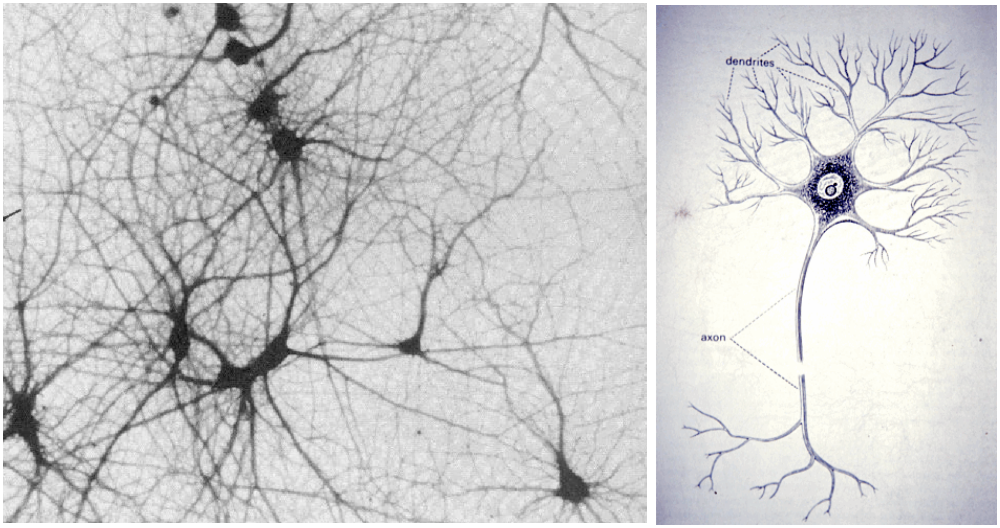

## ANN or SNN

• Изкуствените невронни мрежи (ANN) са много опростен
модел на биологичните невронни мрежи. Те са в основата
на съвременните методи на изкуствения интелект, чрез
които в последните години са постигнати забележителни
успехи

• Импулсните невронни мрежи (SNN) обхващат модели,
имитиращи невронната динамика на мозъка. В допълнение
към невронното и синаптичното състояние, SNN включват
концепцията за време в своя оперативен модел.


# Как работят невронните мрежи (Neural networks, NN)? 

Този модел на обработка на информацията е вдъхновен от структурата на мозъка на биологичните организми: невронът приема сигнали от невроните, с които е свързан, обработва ги и предава информация на свързаните с него неврони от мрежата. 

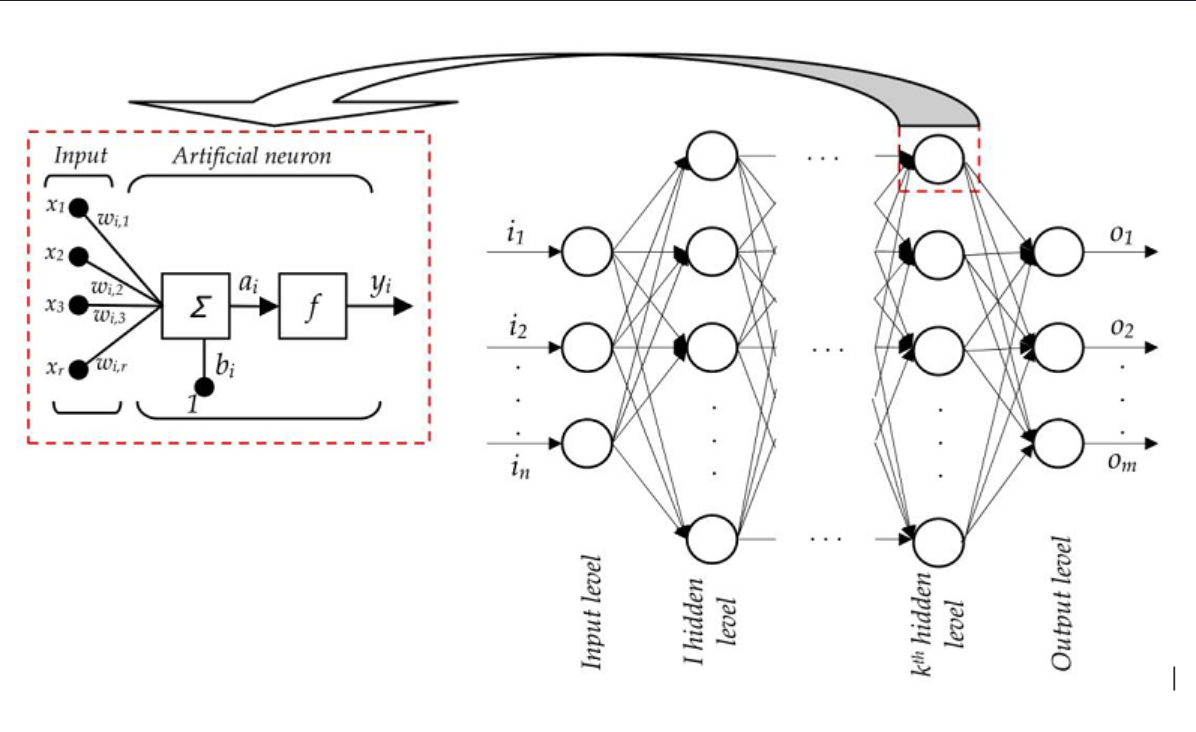

Всеки неврон (напр. $i$ –тият от даден слой или ниво) събира всичката входна информация ($x_j$) към него, обобщава я с определени тегла (${w_i,_j}$), обработва междинния резултат ($a_i$) чрез активиращата функция ($f$) и предава резултата ($y_i$) на всички свързани с него неврони от следващия слой. 
Към входните данни се добавя отклонение ($b_i$, bias), чиято тежест е 1 (така се избягва случаят всички тегла да са нула).


 Невронната мрежа се формира от три типа слоеве:    
- **Входен слой (Input layer)**: Невроните от този слой приемат наблюденията ($i_1$, $i_2$, … , $i_n$). На всеки входен елемент се съпоставя тегло съответно на неговата значимост. (Теглата са въведени по подобие на синаптичните импулси, предавани между биологичните неврони. Отрицателна стойност на теглото съответства на потискащ импулс, а положителна – на възбуждащ.)
- **Скрити слоеве (Hidden layers)**: Това са междинните слоеве между входа и изхода, които помагат на невронната мрежа да научи сложните взаимоотношения, свързани с данните (в някои случаи тези слоеве може да не съществуват); 
- **Изходен слой (Output layer)**: Невроните от този слой извличат крайния резултат ($o_1$, $o_2$, … , $o_m$) от предишните два слоя. 


## Перцептрон

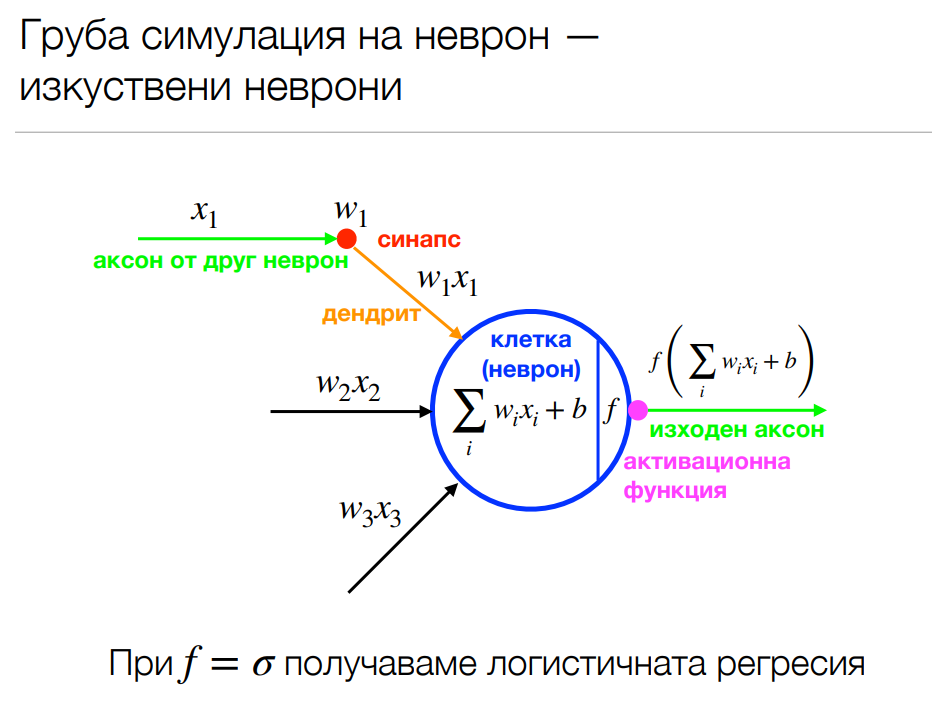

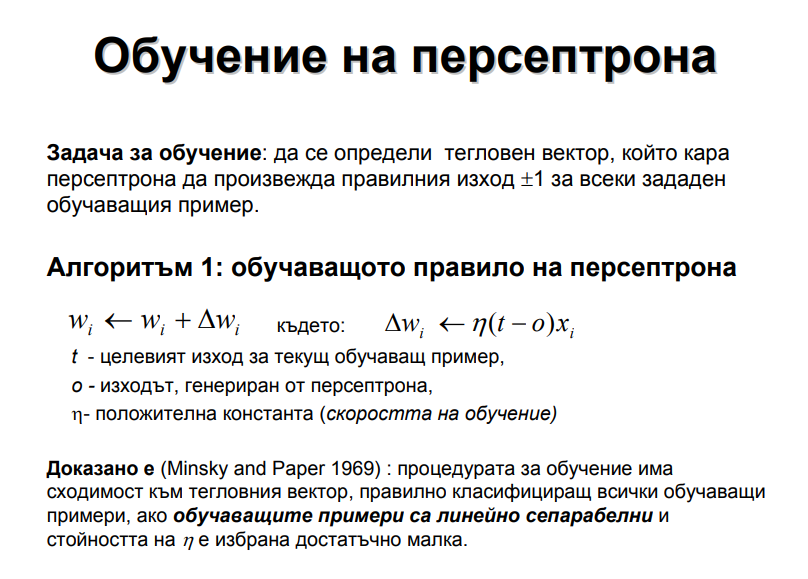

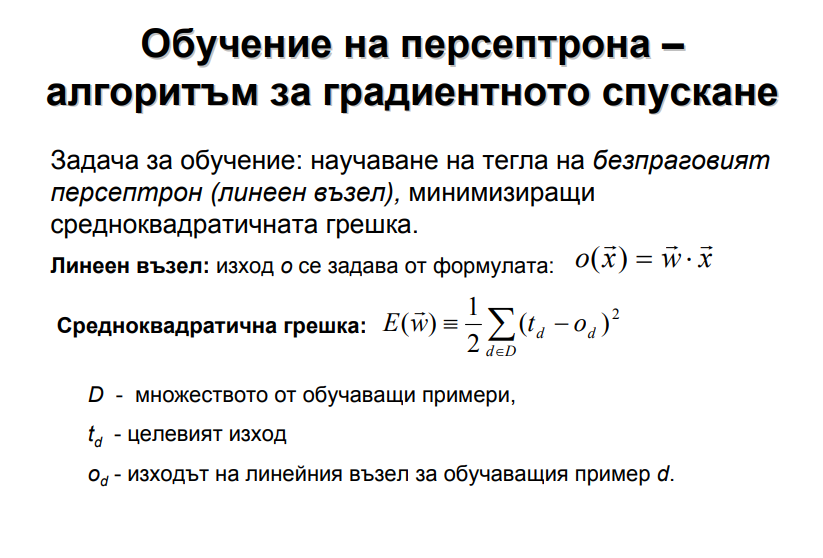

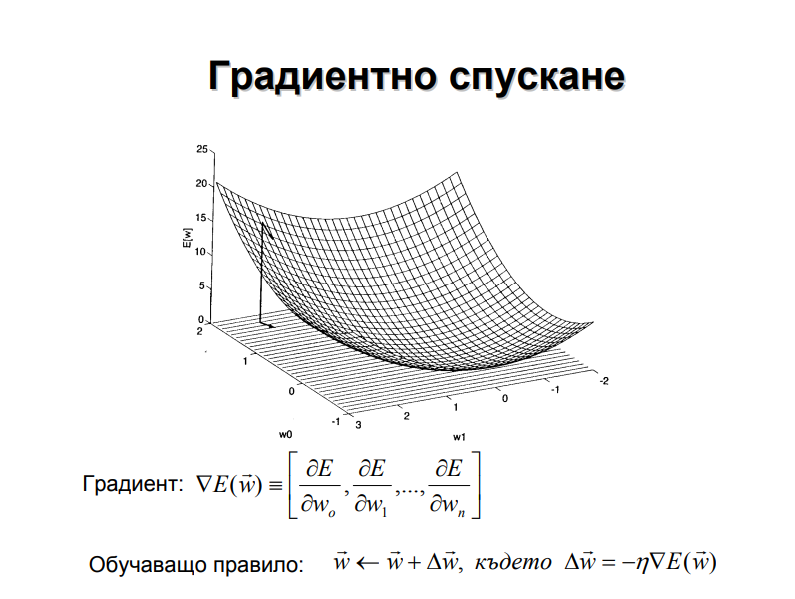

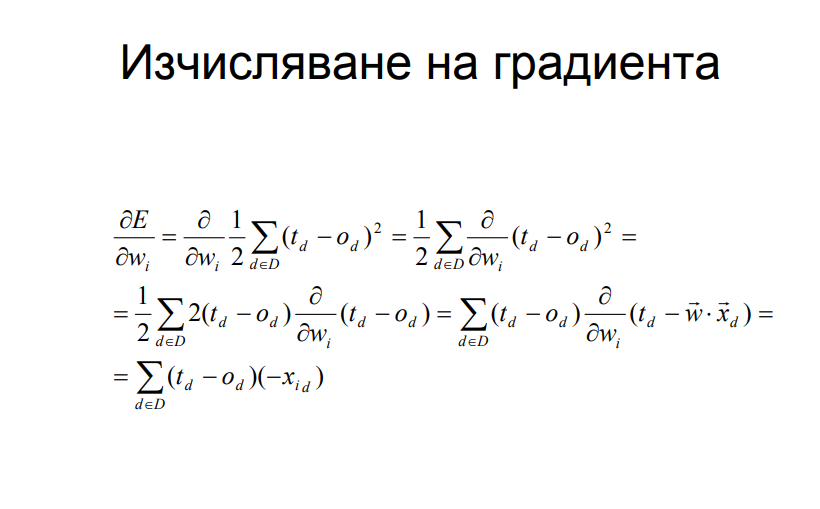

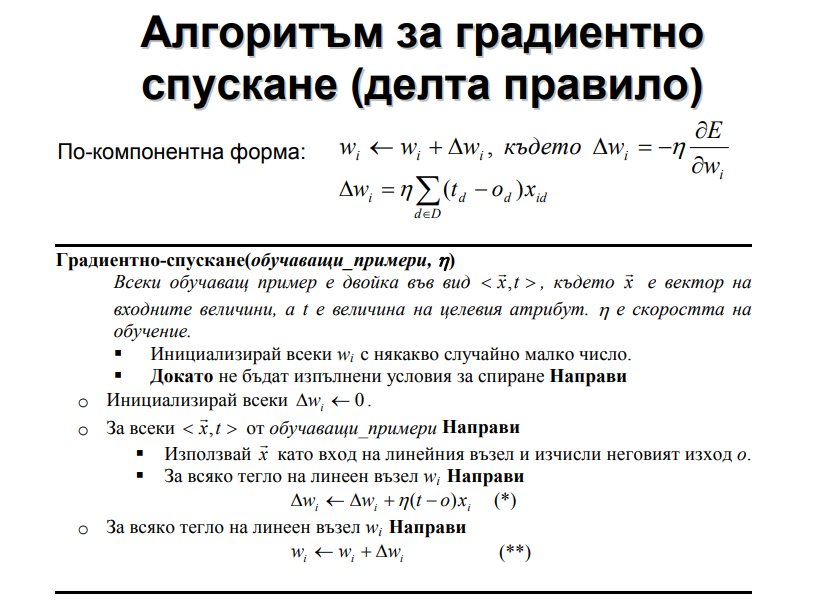

In [38]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                # y_predicted = self.sigmoid(linear_output)
                y_predicted = self.unit_step_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_step_func(self, x):
        return np.where(x >= 0.5, 1, 0)

    def unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        # y_logits = self.sigmoid(linear_output)
        y_predicted = self.unit_step_func(linear_output)
        return y_predicted

Perceptron classification accuracy 1.0


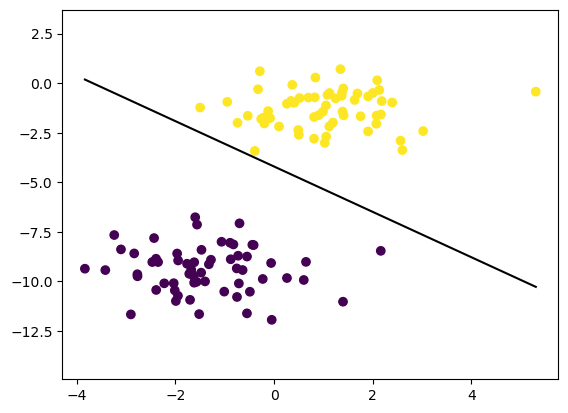

In [39]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(learning_rate=0.01, epochs=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

# Защо ни трябват невронни мрежи?

In [40]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ]
)

In [41]:
# AND
Y_and = np.array([0, 0, 0, 1])

In [42]:
p_and = Perceptron(learning_rate=0.01, epochs=1000)
p_and.fit(X, Y_and)

In [43]:
p_and.predict(X)

array([0, 0, 0, 1])

In [44]:
p_and.weights, p_and.bias

(array([0.02, 0.01]), -0.03)

In [45]:
# OR
Y_or = np.array([0, 1, 1, 1])

In [46]:
p_or = Perceptron(learning_rate=0.01, epochs=1000)
p_or.fit(X, Y_or)

In [47]:
p_or.predict(X)

array([0, 1, 1, 1])

In [48]:
p_or.weights, p_or.bias

(array([0.01, 0.01]), -0.01)

In [49]:
# XOR
Y_xor = np.array([0, 1, 1, 0])

In [50]:
p_xor = Perceptron(learning_rate=0.01, epochs=1000)
p_xor.fit(X, Y_xor)
p_xor.predict(X)

array([1, 1, 0, 0])

In [51]:
p_or.weights, p_or.bias

(array([0.01, 0.01]), -0.01)

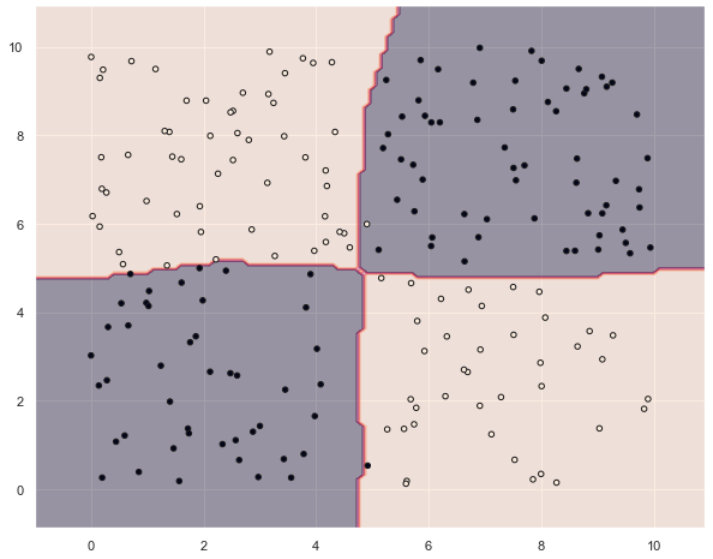

# Параметри на мрежите:

* Архитектура
* Брой слоеве
* Брой неврони във всеки слой
* Активираща функция
* Правило за обновяване на теглата и скорост на обучение (learning rate)
* Размер на "партидата"
* Регуларизации
* И други 

### Активираща функции

In [52]:
x = np.linspace(-10, 10)

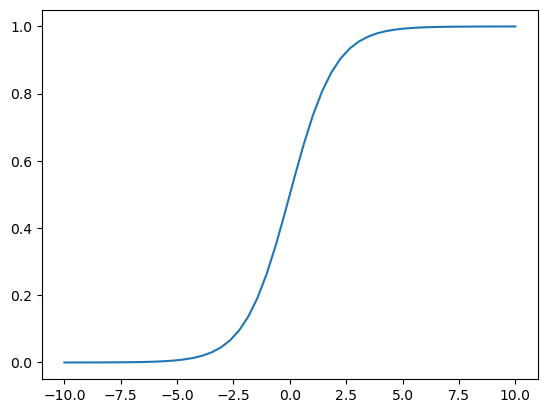

In [53]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


plt.plot(x, sigmoid(x))

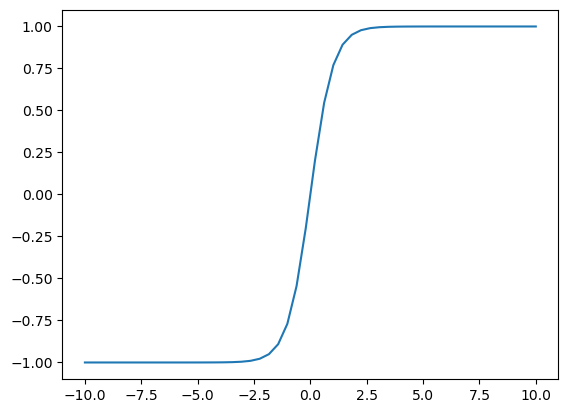

In [54]:
def tanh(x):
    return (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)


plt.plot(x, tanh(x))

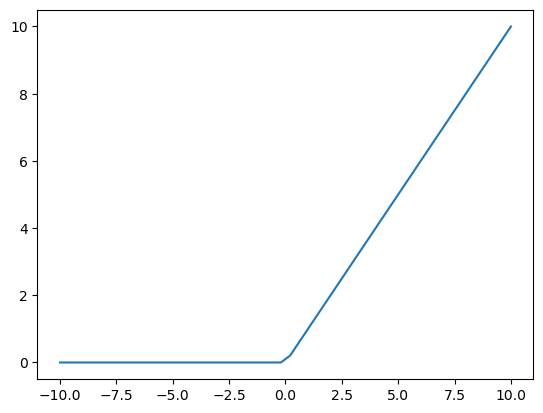

In [55]:
def relu(x):
    z = x > 0
    return x * z


plt.plot(x, relu(x))

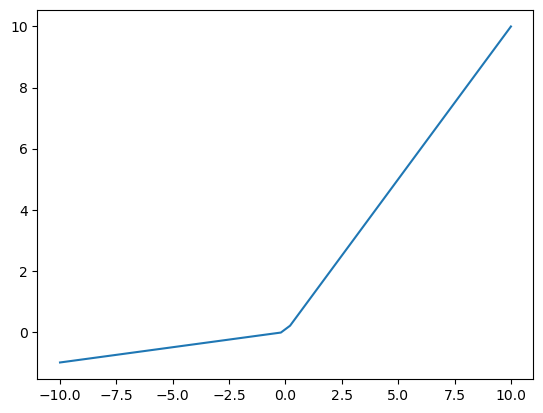

In [56]:
def leaky_rely(x, leakage=0.1):
    x = np.copy(x)
    x[x < 0] *= leakage
    return x


plt.plot(x, leaky_rely(x))

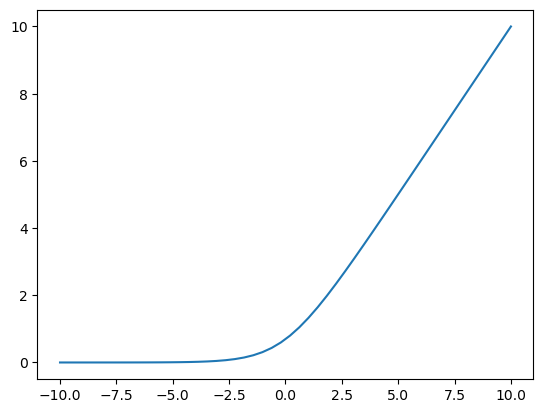

In [57]:
def softplus_function(x):
    return np.log(1 + np.exp(x))


plt.plot(x, softplus_function(x))

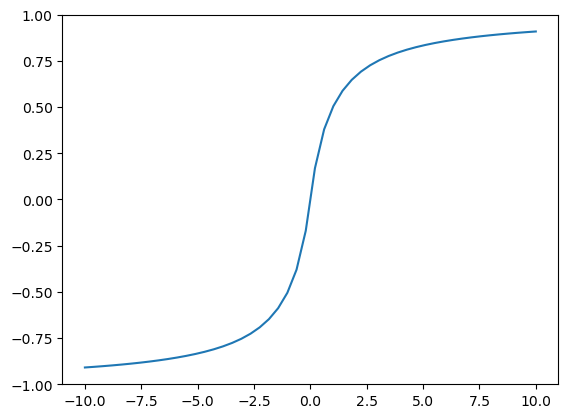

In [58]:
def softsign_function(x):
    return x / (1 + np.abs(x))


plt.plot(x, softsign_function(x))

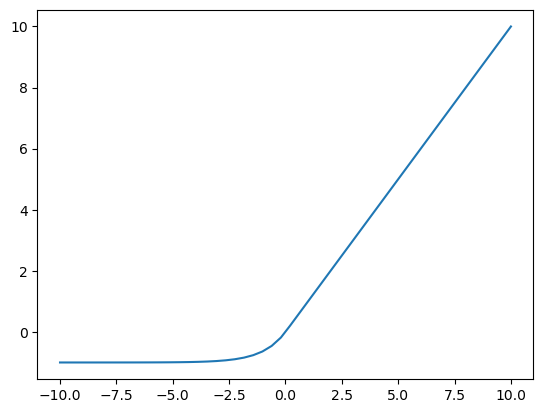

In [59]:
def elu(x, alpha=1):
    x = x.copy()
    neg_indices = x < 0
    x[neg_indices] = alpha * (np.exp(x[neg_indices]) - 1)
    return x


plt.plot(x, elu(x))

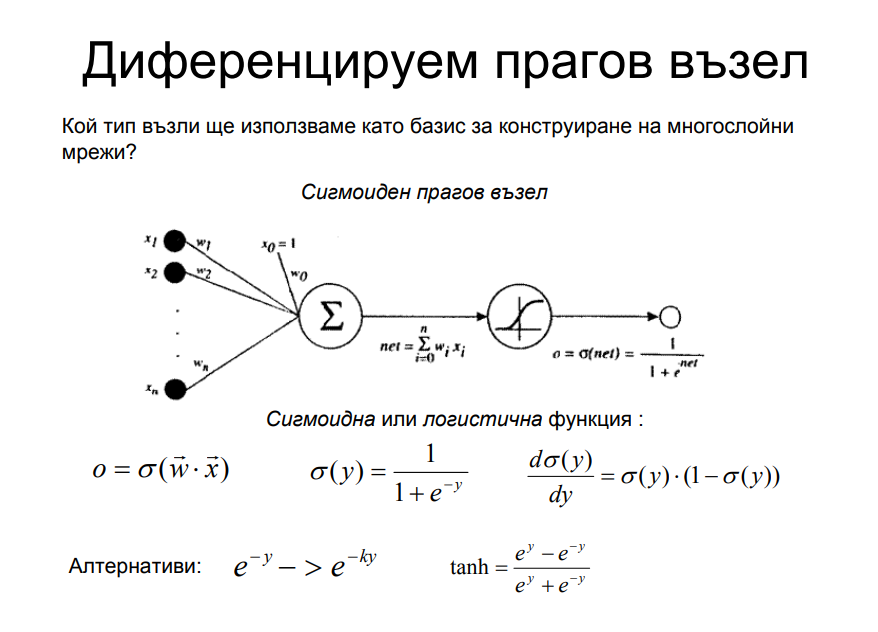

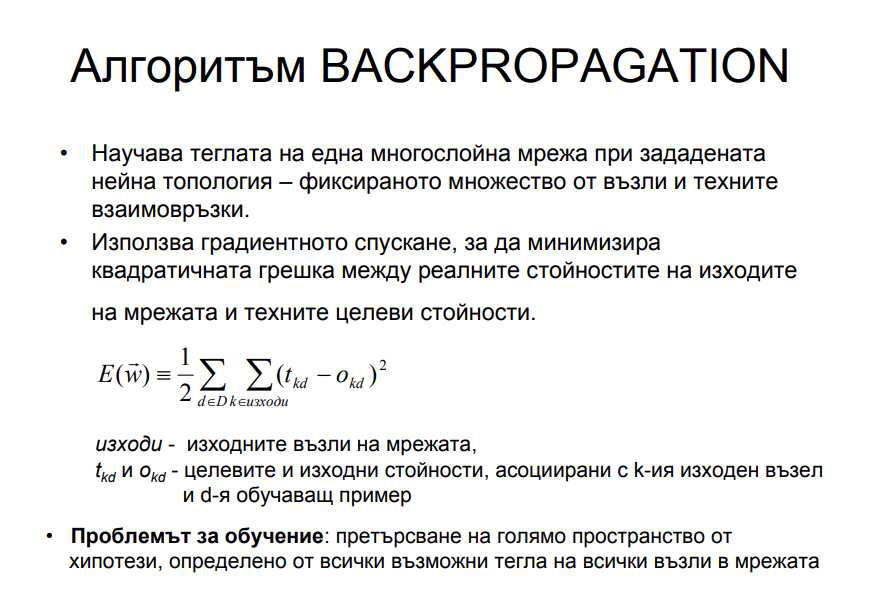

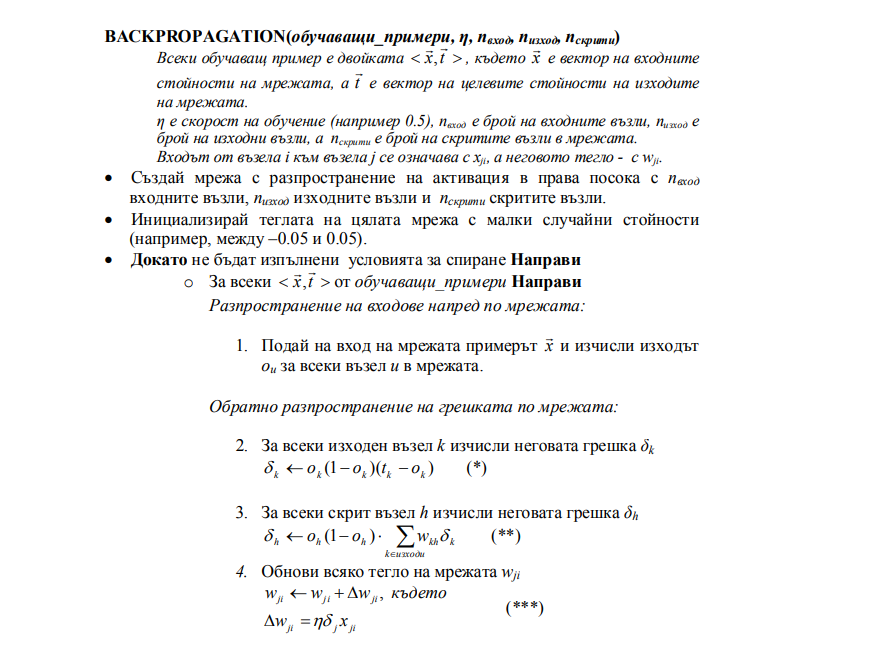

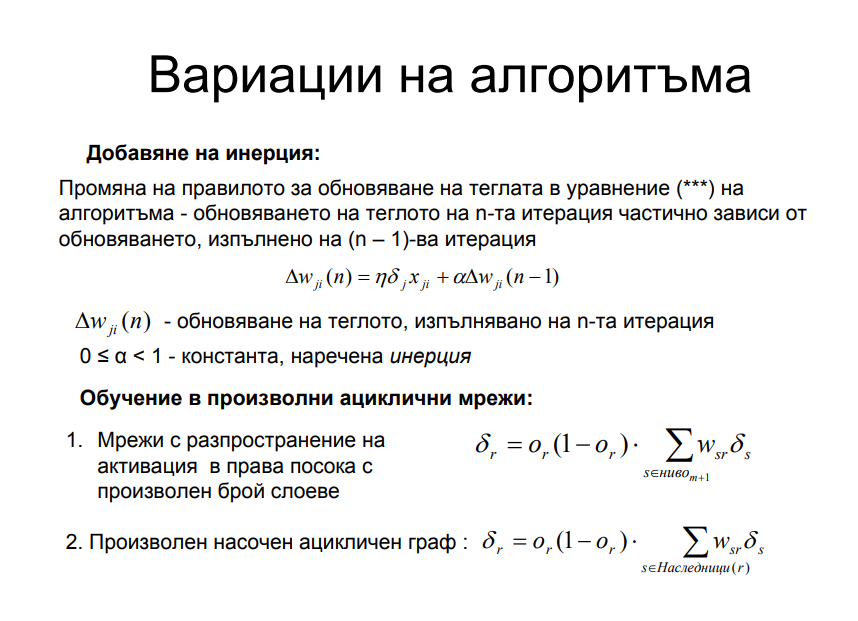

## Изразителната сила на мрежи с разпространение на активация в права посока

• Булеви функции:

Всяка булева функция може да бъде представена абсолютно точно чрез
някаква двуслойна мрежа, макар че в най
-лошия случай броят на
необходимите скрити възли нараства експоненциално с броя на входове на
мрежата.

• Непрекъснати функции.

Всяка ограничена непрекъсната функция може да бъде апроксимирана с
произволно малка грешка от някоя двуслойна мрежа (Cybenko 1989).
В
този случай теоремата се прилага към мрежите, които използват
сигмоидните възли в скрития слой и (безпрагови) линейните възли на
изходния слой. Броят на необходими скрити възли зависи от функцията,
която се апроксимира.

• Произволни функции.

Всяка функция може да бъде апроксимирана с произволна точност от
някоя мрежа с три слоя (Cybenko 1988). Изходният слой се състои от
линейните възли, а двата скрити слоя използват сигмоидните възли, като
броят на необходими възли във всеки слой в общия случай е неизвестен.

# Градиента се смята по-сложно отколкото при логистичната регресия.

Заради това ще добавим още две техники:
* Computational Graph
* Chain Rule
# Computational Graph
С графа, разделяме сметките на най-простите им компоненти. Пример:
    
$ \hat y = \sigma\big( g(x W_1 + b) W_2 + b_2\big)$
<br/>Ще го раздробим на части:
<br/>
<br/>$ op_1 = x W_1  + b $
<br/>$ op_2 = g( op_1) $
<br/>$ op_3 = op_2 * W_2 + b_2 $
<br/>$ op_4 = \sigma (op_3) $

Да добавим и грешката:
<br/>$ op_5 = J(op_4) $
# Верижно правило (Chain Rule)

"Chain rule" е фомрула за пресмятане на производните на композитни функции:


Нека $F = f ∘ g$, или $F(x) = f(g(x))$ за всяко $x$. Тогава:
$$ F'(x)=f'(g(x))g'(x) $$
или ако $ z=f(y)$ и $y=g(x) $, тогава:

$$\frac{dz}{dx}={\frac{dz}{dy}}\cdot {\frac  {dy}{dx}}$$
Тези две техники ни позволяват да намерим градиента за всяко `W` и `b`:
$$\frac{\partial}{\partial w} J(W)$$



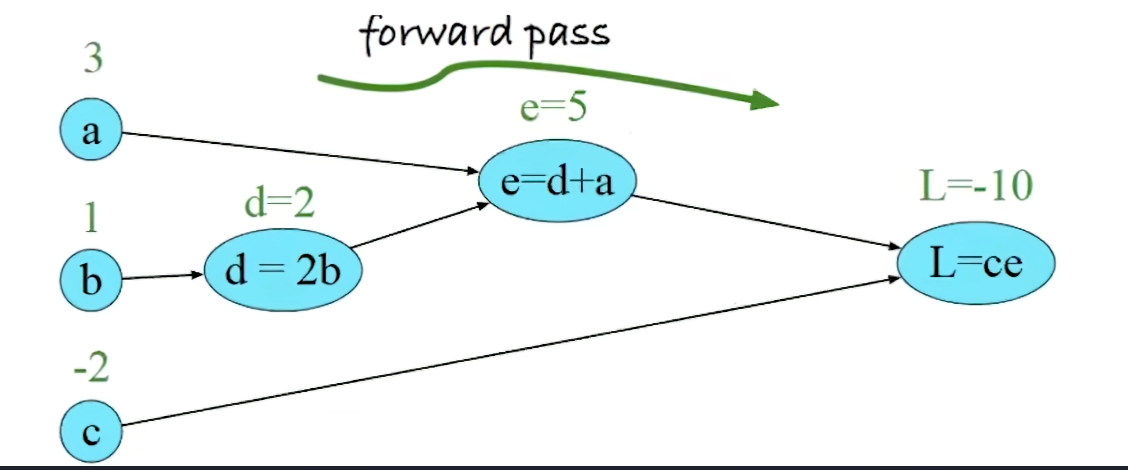

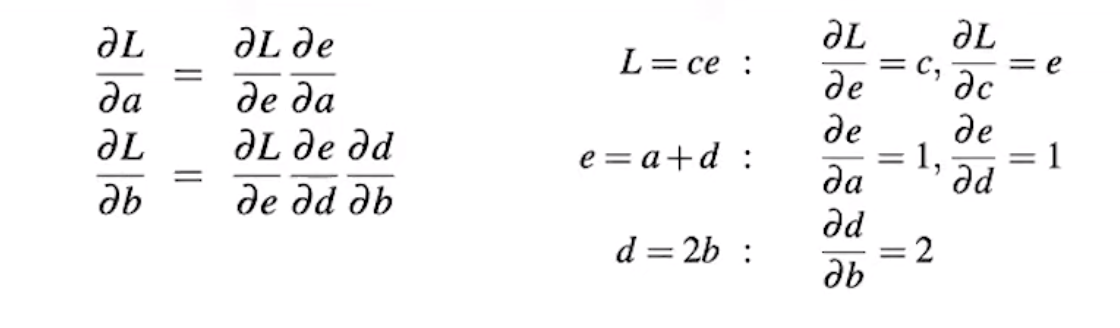

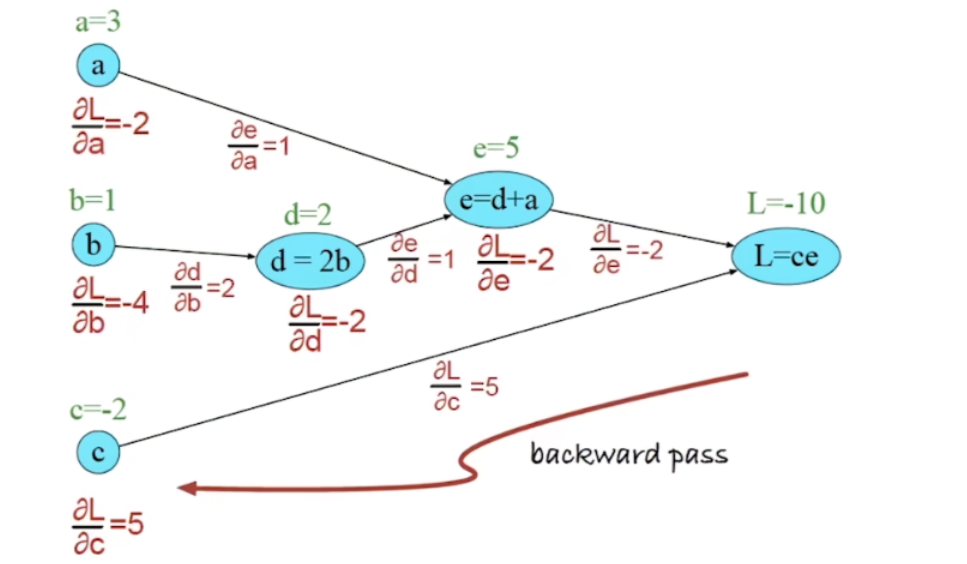

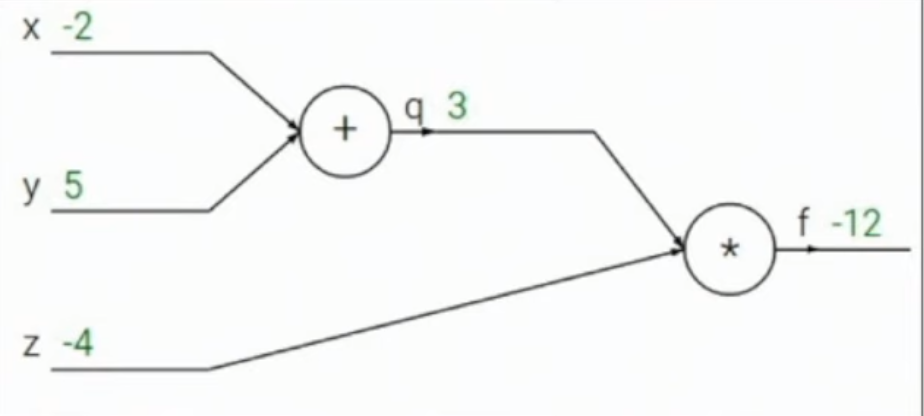

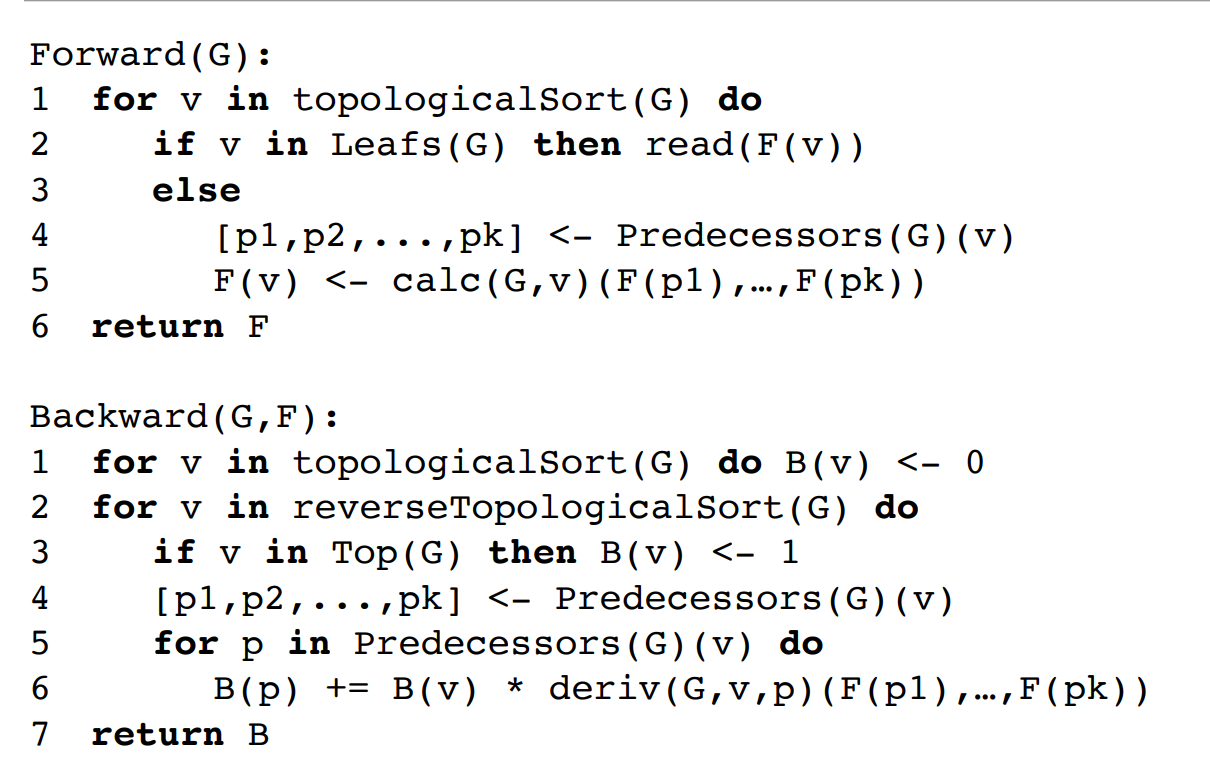

In [60]:
def f(x):
    return 3 * x**2 - 4 * x + 5

In [61]:
f(3.0)

20.0

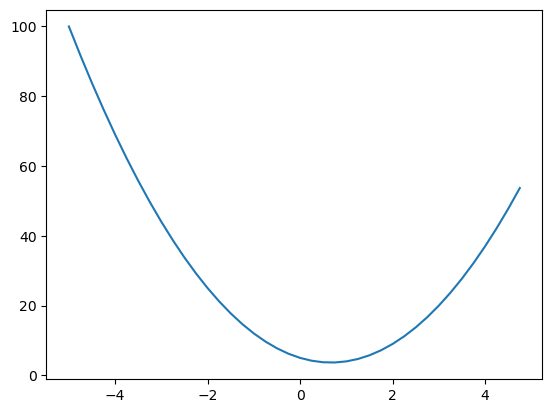

In [62]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [63]:
h = 0.000001
x = 2 / 3
(f(x + h) - f(x)) / h

2.999378523327323e-06

In [64]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [65]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c

print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1) / h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [66]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [67]:
from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [68]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label="f")
L = d * f
L.label = "L"
L

Value(data=-8.0)

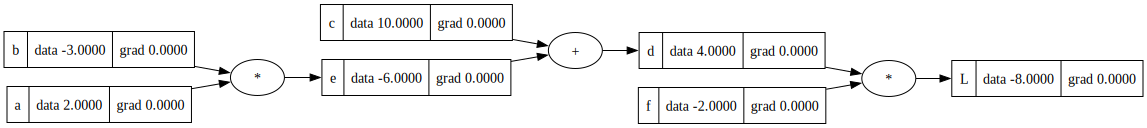

In [69]:
draw_dot(L)

In [70]:
def clojure():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    a.data += h
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


clojure()

6.000000000000227


In [71]:
L.backward()

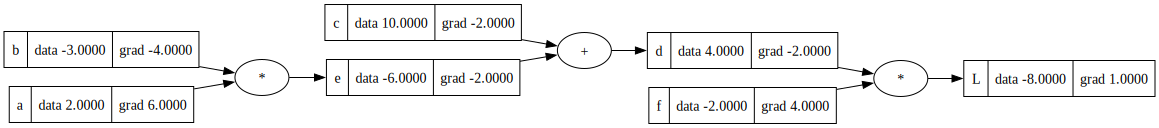

In [72]:
draw_dot(L)

In [73]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


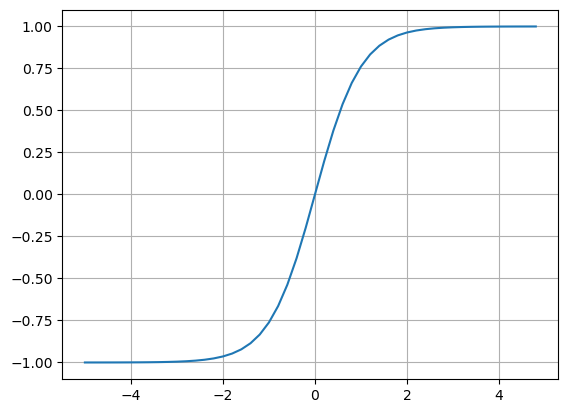

In [74]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [75]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "o"

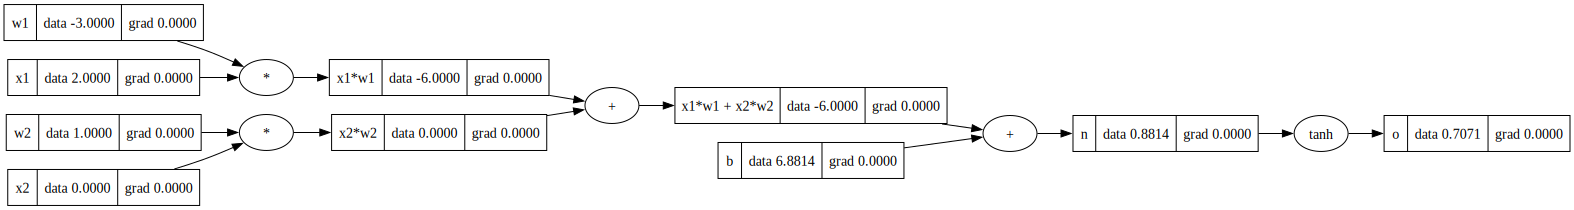

In [76]:
draw_dot(o)

In [77]:
o.backward()

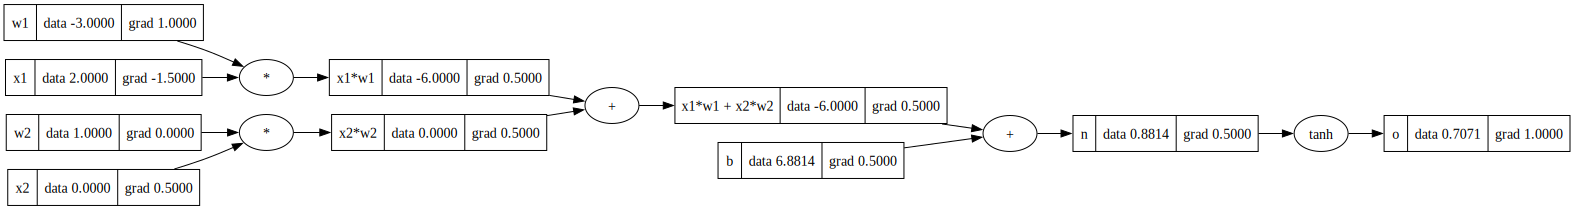

In [78]:
draw_dot(o)

In [79]:
topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)


build_topo(o)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [97]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(
            other, (int, float)
        ), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad

        out._backward = _backward

        return out

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):  # self / other
        return self * other**-1

    def __neg__(self):  # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __radd__(self, other):  # other + self
        return self + other

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

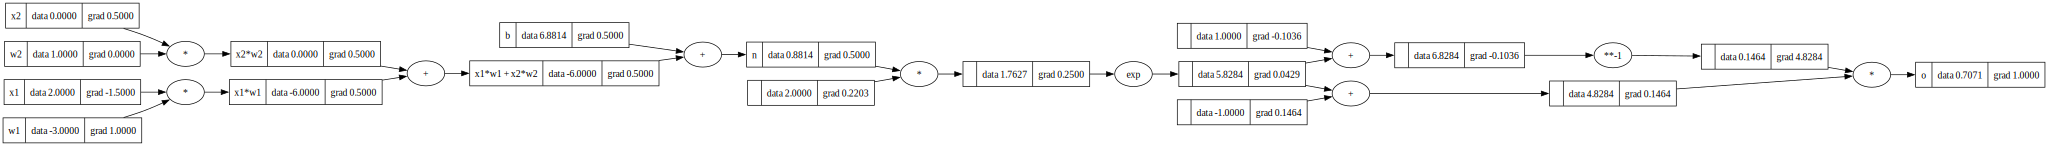

In [100]:
# inputs x1,x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights w1,w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
# bias of the neuron
b = Value(6.8813735870195432, label="b")
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"
n = x1w1x2w2 + b
n.label = "n"
# ----
e = (2 * n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = "o"
o.backward()
draw_dot(o)

In [101]:
class Neuron:
    def __init__(self, n_in):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(n_in)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, n_in, n_out):
        self.neurons = [Neuron(n_in) for _ in range(n_out)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, layer_sizes):
        self.layers = [
            Layer(layer_sizes[i], layer_sizes[i + 1])
            for i in range(len(layer_sizes) - 1)
        ]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [102]:
x = [2.0, 3.0, -1.0]
model = MLP([3, 4, 4, 1])
model(x)

Value(data=0.4921828276351319)

In [103]:
X = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
y = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [104]:
def tainNN(model, X, y, learning_rate=0.01, epochs=20):
    for k in range(epochs):
        # forward pass
        y_pred = [model(x) for x in X]
        loss = sum((y_out - y_true) ** 2 for y_true, y_out in zip(y, y_pred))

        # backward pass
        for p in model.parameters():
            p.grad = 0.0
        loss.backward()

        # update
        for p in model.parameters():
            p.data -= learning_rate * p.grad

        print(k, loss.data)

In [105]:
tainNN(model, X, y, epochs=20)

0 3.9375860639094715
1 3.7788739609197726
2 3.6580186230147493
3 3.5623306010416607
4 3.4826017941621843
5 3.412944945765149
6 3.3498059409526686
7 3.2910616373973673
8 3.235412958970113
9 3.182024777635492
10 3.130323695892636
11 3.079886420715912
12 3.0303776552858137
13 2.981514610430156
14 2.9330458836681848
15 2.884738254133195
16 2.8363680016025894
17 2.7877149556672647
18 2.738558320449727
19 2.6886737719996057


In [106]:
y_pred = [model(x) for x in X]
y_pred

[Value(data=0.4236396939352176),
 Value(data=-0.50643680408196),
 Value(data=0.1623495473383321),
 Value(data=0.1568041269268973)]

# Време е да видим нещо по-яко (демо):

http://playground.tensorflow.org/

## Tensorflow

In [32]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Load dataset
data = load_wine()

In [67]:
# Convert to pandas dataframe just to have it in nice tabular format to explore it more clearly.
df = pd.DataFrame(
    data=np.c_[data["data"], data["target"]], columns=data["feature_names"] + ["target"]
)
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [68]:
df.shape, df.target.value_counts()

((178, 14),
 target
 1.0    71
 0.0    59
 2.0    48
 Name: count, dtype: int64)

In [69]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 13), (59, 13), (119,), (59,))

Нека нормализираме данните

In [70]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

Сега нека направим класификация, но използвайки невронна мрежа. Ние сами ще дефинираме операциите в невронната мрежа. Първо ще използваме само линейни трансформации и без да оптимизираме теглата

In [71]:
g = tf.random.Generator.from_seed(1234)
W1 = tf.Variable(g.normal(shape=[13, 50], dtype="float32"))
b1 = tf.Variable(g.normal(shape=[50], dtype="float32"))
W2 = tf.Variable(g.normal(shape=[50, 3], dtype="float32"))
b2 = tf.Variable(g.normal(shape=[3], dtype="float32"))
parameters = [W1, b1, W2, b2]

In [72]:
sum(
    tf.size(p) for p in parameters
).numpy()  # number of parameters in total = 13 * 50 + 50 * 3 + 50 + 3

853

In [ ]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()

with tf.GradientTape() as tape:
    tape.watch(W1)
    tape.watch(W2)
    tape.watch(b1)
    tape.watch(b2)
    h = X_train @ W1 + b1
    logits = h @ W2 + b2
    loss = loss_fn(y_train, logits)

    [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

W1.assign_add(-0.1 * dl_dW1)
b1.assign_add(-0.1 * dl_db1)
W2.assign_add(-0.1 * dl_dW2)
b2.assign_add(-0.1 * dl_db2)

print(loss)

<tf.Variable 'Variable:0' shape=(50,) dtype=float32, numpy=
array([ 0.41722992, -0.7415817 ,  0.7573643 , -0.00755857,  0.13058525,
       -0.96067023, -0.98194194, -1.7087452 , -0.15949531, -0.9144235 ,
        0.5143526 , -0.7142723 , -1.4410735 , -0.44380322, -0.9740772 ,
       -2.4848385 , -0.00549239,  0.5631981 ,  1.3988104 ,  1.3078275 ,
        0.5322951 , -0.43955037, -0.03360563,  0.5972397 ,  0.5132812 ,
        0.9438932 ,  0.38017073,  0.8968648 ,  0.16827898, -0.9482544 ,
       -0.4288875 ,  1.3894459 , -0.99994   , -0.6876405 ,  1.9175478 ,
       -0.8656439 ,  1.1614838 ,  0.9143183 , -1.2972369 , -0.37072963,
        0.6836968 , -0.2255374 , -0.5511115 ,  0.15355068,  1.1965742 ,
        2.0626667 , -0.9327094 ,  0.25875157,  1.246272  ,  2.0844738 ],
      dtype=float32)>
tf.Tensor(3.406807, shape=(), dtype=float32)


In [ ]:
# inference

h = X_test @ W1 + b1
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.6440677966101694


In [ ]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()
epochs = 50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch(W1)
        tape.watch(W2)
        tape.watch(b1)
        tape.watch(b2)
        h = tf.math.tanh(X_train @ W1 + b1)
        logits = h @ W2 + b2
        probs = logits
        # print(probs)
        loss = loss_fn(y_train, probs)

        [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

        W1.assign_add(-0.1 * dl_dW1)
        b1.assign_add(-0.1 * dl_db1)
        W2.assign_add(-0.1 * dl_dW2)
        b2.assign_add(-0.1 * dl_db2)

    print(loss)

tf.Tensor(1.8015751, shape=(), dtype=float32)
tf.Tensor(1.5843841, shape=(), dtype=float32)
tf.Tensor(1.4033997, shape=(), dtype=float32)
tf.Tensor(1.2505901, shape=(), dtype=float32)
tf.Tensor(1.1214095, shape=(), dtype=float32)
tf.Tensor(1.0122123, shape=(), dtype=float32)
tf.Tensor(0.9194433, shape=(), dtype=float32)
tf.Tensor(0.83970815, shape=(), dtype=float32)
tf.Tensor(0.7701422, shape=(), dtype=float32)
tf.Tensor(0.70865005, shape=(), dtype=float32)
tf.Tensor(0.65378803, shape=(), dtype=float32)
tf.Tensor(0.60451376, shape=(), dtype=float32)
tf.Tensor(0.5600232, shape=(), dtype=float32)
tf.Tensor(0.5196966, shape=(), dtype=float32)
tf.Tensor(0.48308235, shape=(), dtype=float32)
tf.Tensor(0.4498588, shape=(), dtype=float32)
tf.Tensor(0.4197663, shape=(), dtype=float32)
tf.Tensor(0.39254194, shape=(), dtype=float32)
tf.Tensor(0.36788735, shape=(), dtype=float32)
tf.Tensor(0.3454789, shape=(), dtype=float32)
tf.Tensor(0.32500103, shape=(), dtype=float32)
tf.Tensor(0.30617562, shap

In [ ]:
dl_dW1.shape

TensorShape([13, 50])

In [ ]:
# inference

h = tf.math.tanh(X_test @ W1 + b1)
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.9661016949152542


In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
# Load dataset
data = load_wine()

In [ ]:
# Convert to pandas dataframe just to have it in nice tabular format to explore it more clearly.
df = pd.DataFrame(
    data=np.c_[data["data"], data["target"]], columns=data["feature_names"] + ["target"]
)
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [ ]:
df.shape, df.target.value_counts()

((178, 14),
 1.0    71
 0.0    59
 2.0    48
 Name: target, dtype: int64)

In [ ]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 13), (59, 13), (119,), (59,))

#### Нека да нормализираме данните

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### Сега ще дефинираме нашата невронна мрежа tf.Variable ни разрешава да създадем n мерен тензор и със tf.GradientTape можем да следим операцийте върху тензорите и да сметнем после градиента им. Крос ентропията е функция на грешаката която смята колко близки са две разпределения. Можем да я използваме за класификация при повече от два класа. SparseCategoricalCrossentropy не изисква да правим one-hot encoding на класовете.

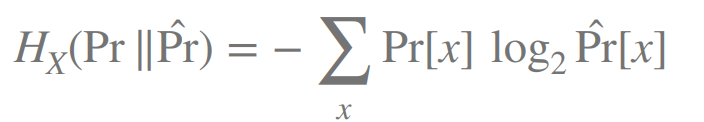

In [ ]:
g = tf.random.Generator.from_seed(1234)
W1 = tf.Variable(g.normal(shape=[13, 50], dtype="float32"))
b1 = tf.Variable(g.normal(shape=[50], dtype="float32"))
W2 = tf.Variable(g.normal(shape=[50, 3], dtype="float32"))
b2 = tf.Variable(g.normal(shape=[3], dtype="float32"))
parameters = [W1, b1, W2, b2]

In [ ]:
sum(
    tf.size(p) for p in parameters
).numpy()  # number of parameters in total = 13*50+50*3+50+3

853

In [ ]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()  # makes execution eager

with tf.GradientTape() as tape:
    tape.watch(W1)
    tape.watch(W2)
    tape.watch(b1)
    tape.watch(b2)
    h = X_train @ W1 + b1
    logits = h @ W2 + b2
    loss = loss_fn(y_train, logits)

    [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

W1.assign_add(-0.1 * dl_dW1)
b1.assign_add(-0.1 * dl_db1)
W2.assign_add(-0.1 * dl_dW2)
b2.assign_add(-0.1 * dl_db2)

print(loss)

tf.Tensor(22.837023, shape=(), dtype=float32)


In [ ]:
# inference

h = X_test @ W1 + b1
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.6440677966101694


In [ ]:
# formula
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.compat.v1.enable_eager_execution()
epochs = 50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        tape.watch(W1)
        tape.watch(W2)
        tape.watch(b1)
        tape.watch(b2)
        h = tf.math.tanh(X_train @ W1 + b1)
        logits = h @ W2 + b2
        probs = logits
        # print(probs)
        loss = loss_fn(y_train, probs)

        [dl_dW1, dl_db1, dl_dW2, dl_db2] = tape.gradient(loss, [W1, b1, W2, b2])

        W1.assign_add(-0.1 * dl_dW1)
        b1.assign_add(-0.1 * dl_db1)
        W2.assign_add(-0.1 * dl_dW2)
        b2.assign_add(-0.1 * dl_db2)

    print(loss)

tf.Tensor(1.8015751, shape=(), dtype=float32)
tf.Tensor(1.5843841, shape=(), dtype=float32)
tf.Tensor(1.4033997, shape=(), dtype=float32)
tf.Tensor(1.2505901, shape=(), dtype=float32)
tf.Tensor(1.1214095, shape=(), dtype=float32)
tf.Tensor(1.0122123, shape=(), dtype=float32)
tf.Tensor(0.9194433, shape=(), dtype=float32)
tf.Tensor(0.83970815, shape=(), dtype=float32)
tf.Tensor(0.7701422, shape=(), dtype=float32)
tf.Tensor(0.70865005, shape=(), dtype=float32)
tf.Tensor(0.65378803, shape=(), dtype=float32)
tf.Tensor(0.60451376, shape=(), dtype=float32)
tf.Tensor(0.5600232, shape=(), dtype=float32)
tf.Tensor(0.5196966, shape=(), dtype=float32)
tf.Tensor(0.48308235, shape=(), dtype=float32)
tf.Tensor(0.4498588, shape=(), dtype=float32)
tf.Tensor(0.4197663, shape=(), dtype=float32)
tf.Tensor(0.39254194, shape=(), dtype=float32)
tf.Tensor(0.36788735, shape=(), dtype=float32)
tf.Tensor(0.3454789, shape=(), dtype=float32)
tf.Tensor(0.32500103, shape=(), dtype=float32)
tf.Tensor(0.30617562, shap

In [ ]:
dl_dW1.shape

TensorShape([13, 50])

In [ ]:
# inference

h = tf.math.tanh(X_test @ W1 + b1)
logits = h @ W2 + b2

correctly = (tf.math.argmax(logits, axis=1).numpy() == y_test).sum()
accuracy = correctly / len(y_test)
print(accuracy)

0.9830508474576272


In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
import random
from IPython import display
from matplotlib import pyplot as plt

In [ ]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    set_default()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis("square")
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True:
        plt.axis("equal")
    plt.axis("off")

    _m, _c = 0, ".15"
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)

    data = tf.convert_to_tensor(np.vstack((xx.reshape(-1), yy.reshape(-1))).T)
    Z = model(data)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

In [ ]:
seed = 12345
random.seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [ ]:
X = np.zeros((N * C, D))
y = np.zeros(N * C, dtype="float32")
for c in range(C):
    index = 0
    t = tf.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = (
        tf.linspace(
            # When t = 0
            (2 * math.pi / C) * (c),
            # When t = 1
            (2 * math.pi / C) * (2 + c),
            N,
        )
        + tf.random.normal([N]) * 0.2
    )

    for ix in range(N * c, N * (c + 1)):
        X[ix] = (
            t[index]
            * tf.convert_to_tensor(
                (math.sin(inner_var[index]), math.cos(inner_var[index])),
                dtype="float64",
            ).numpy()
        )
        y[ix] = c
        index += 1

X = tf.convert_to_tensor(X)
y = tf.convert_to_tensor(y)
print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (3000, 2)
y: (3000,)


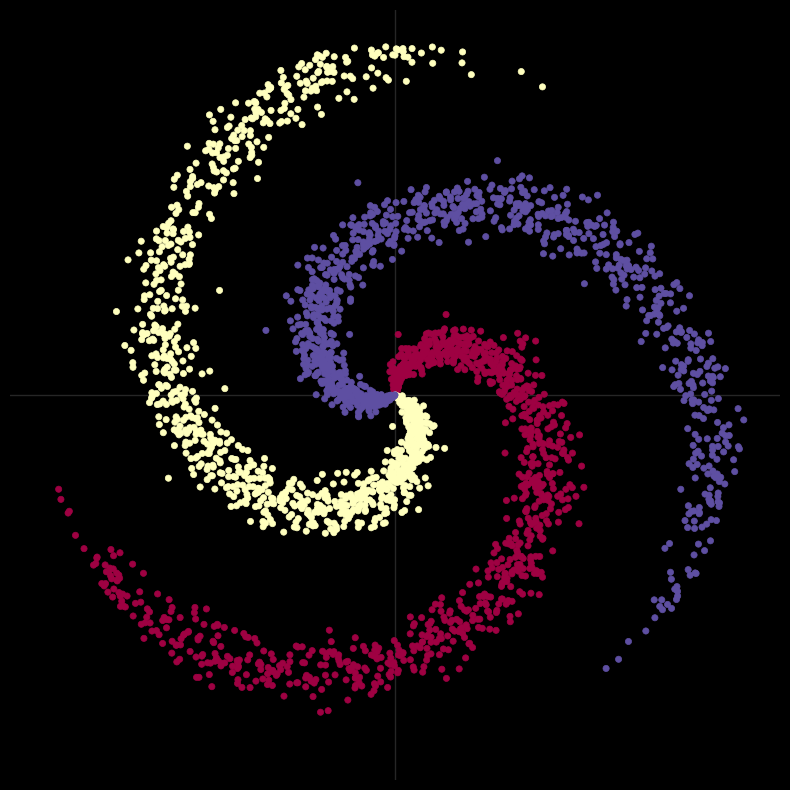

In [ ]:
# visualise the data
plot_data(X, y)

In [ ]:
learning_rate = 1e-3
lambda_l2 = 1e-5

## Keras

Keras е бибилиотека вече вградена в tf която ни разрешава лесно да създаваме невронни мрежи от различни архитектури. Dense(x) е плътен слой в НМ т.е. всеки неврон от слой n-1 е свързан с всеки от слой n и изходния слой има x на брой възела. Sequential ни разрез решава да навържем тези слоеве в една мрежа. SGD е опримизатор който използва стандартно стохастично спускане по градиент има много различни. След компилиране на модела с оптимизатора му можем просто да викнем .fit както в sklearn.

In [ ]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = tf.keras.Sequential(
    (tf.keras.layers.Dense(D), tf.keras.layers.Dense(H), tf.keras.layers.Dense(C))
)

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = tf.keras.optimizers.experimental.SGD(
    lr=learning_rate, weight_decay=lambda_l2
)  # built-in L2
# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
)
# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 1.0092
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.9711
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.9407
Epoch 4/100
94/94 [==============================] - 1s 5ms/step - loss: 0.9142
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.8889
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.8637
Epoch 7/100
94/94 [==============================] - 1s 5ms/step - loss: 0.8401
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.8198
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.8041
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.7931
Epoch 11/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7853
Epoch 12/100
94/94 [==============================] - 0s 3ms/step - loss: 0.7812
Epoch 13/100
94/94 [=================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


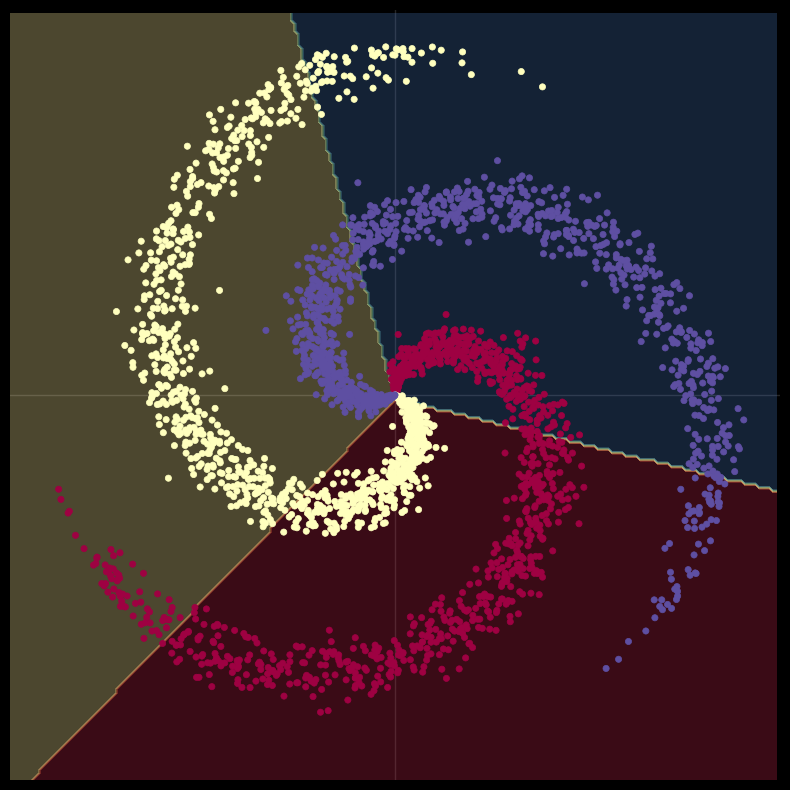

In [ ]:
print(model)
plot_model(X, y, model)

### Виждаме, че модела не може да се справи само със линейни възли нека да пробраме да добавим не линейни активационни ф-ии.

In [ ]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = tf.keras.Sequential(
    (
        tf.keras.layers.Dense(D),
        tf.keras.layers.Dense(H, activation="relu"),
        tf.keras.layers.Dense(C),
    )
)

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = tf.keras.optimizers.experimental.SGD(
    lr=learning_rate, weight_decay=lambda_l2
)  # built-in L2
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
)

model.fit(X, y, epochs=200)

Epoch 1/200
94/94 [==============================] - 1s 2ms/step - loss: 1.0867
Epoch 2/200
94/94 [==============================] - 0s 2ms/step - loss: 1.0509
Epoch 3/200
94/94 [==============================] - 0s 2ms/step - loss: 1.0188
Epoch 4/200
94/94 [==============================] - 0s 2ms/step - loss: 0.9882
Epoch 5/200
94/94 [==============================] - 0s 2ms/step - loss: 0.9586
Epoch 6/200
94/94 [==============================] - 0s 2ms/step - loss: 0.9297
Epoch 7/200
94/94 [==============================] - 0s 2ms/step - loss: 0.9018
Epoch 8/200
94/94 [==============================] - 0s 2ms/step - loss: 0.8753
Epoch 9/200
94/94 [==============================] - 0s 2ms/step - loss: 0.8508
Epoch 10/200
94/94 [==============================] - 0s 2ms/step - loss: 0.8286
Epoch 11/200
94/94 [==============================] - 0s 2ms/step - loss: 0.8091
Epoch 12/200
94/94 [==============================] - 0s 2ms/step - loss: 0.7922
Epoch 13/200
94/94 [=================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


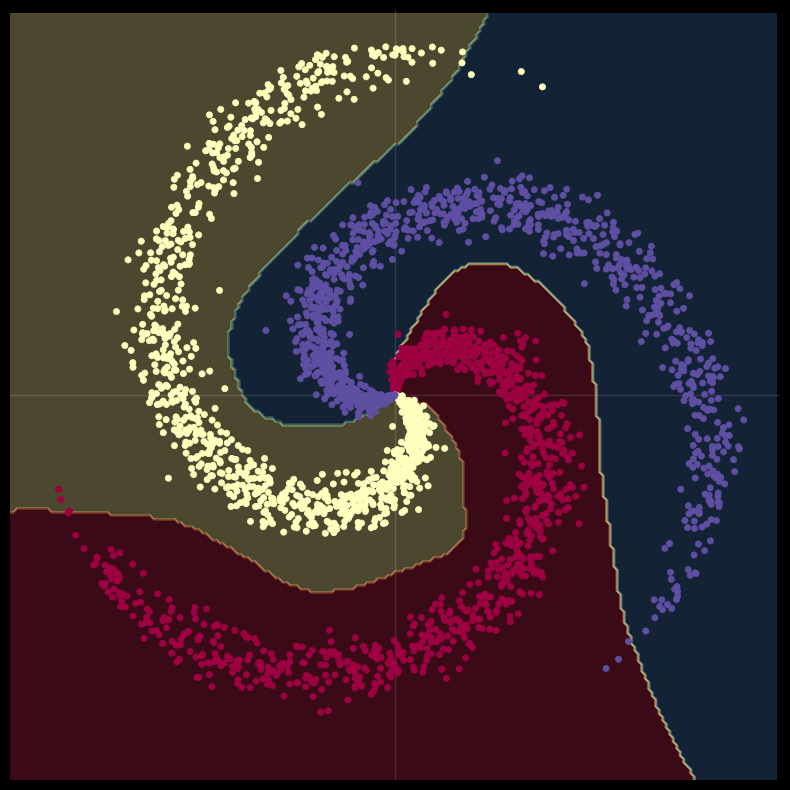

In [ ]:
plot_model(X, y, model)
print(model)

Една от основните сили на ИНМ е че могат да сесправят с "не структурирани" данни като изображения.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

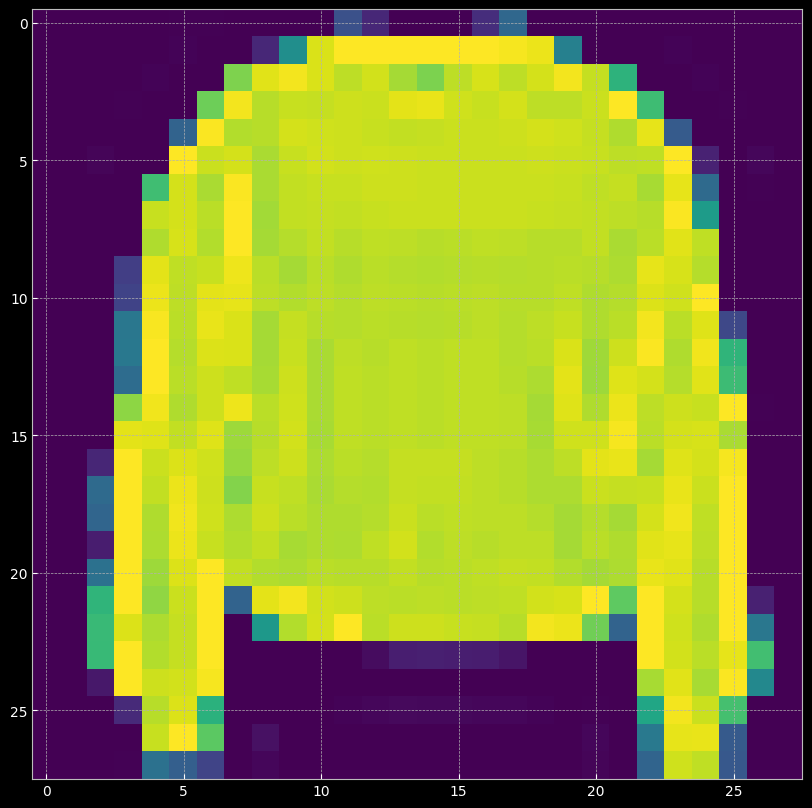

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# How many classes are there (this'll be our output shape)?
len(class_names)

10

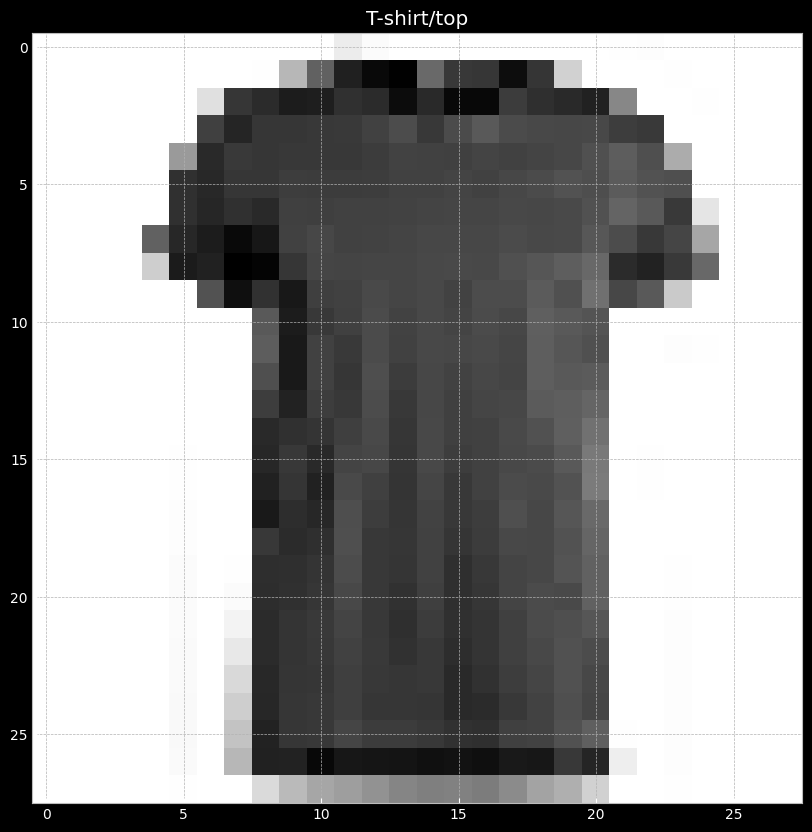

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)  # change the colours to black & white
plt.title(class_names[train_labels[17]])

### Трабва първо да се оверим, че данните са скалирани.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model.fit(
    train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6282 - accuracy: 0.3709 - val_loss: 1.3271 - val_accuracy: 0.5134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1566 - accuracy: 0.5640 - val_loss: 1.0536 - val_accuracy: 0.6002
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9632 - accuracy: 0.6272 - val_loss: 0.9216 - val_accuracy: 0.6363
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8702 - accuracy: 0.6592 - val_loss: 0.8474 - val_accuracy: 0.6782
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7839 - accuracy: 0.6968 - val_loss: 0.7768 - val_accuracy: 0.7000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7340 - accuracy: 0.7133 - val_loss: 0.7404 - val_accuracy: 0.7097
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7055 - accuracy: 0.7210 - val_loss: 0.7234 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


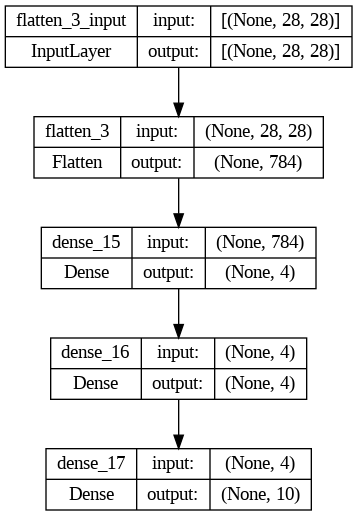

In [ ]:
plot_model(model, show_shapes=True)

<Axes: title={'center': 'training history'}>

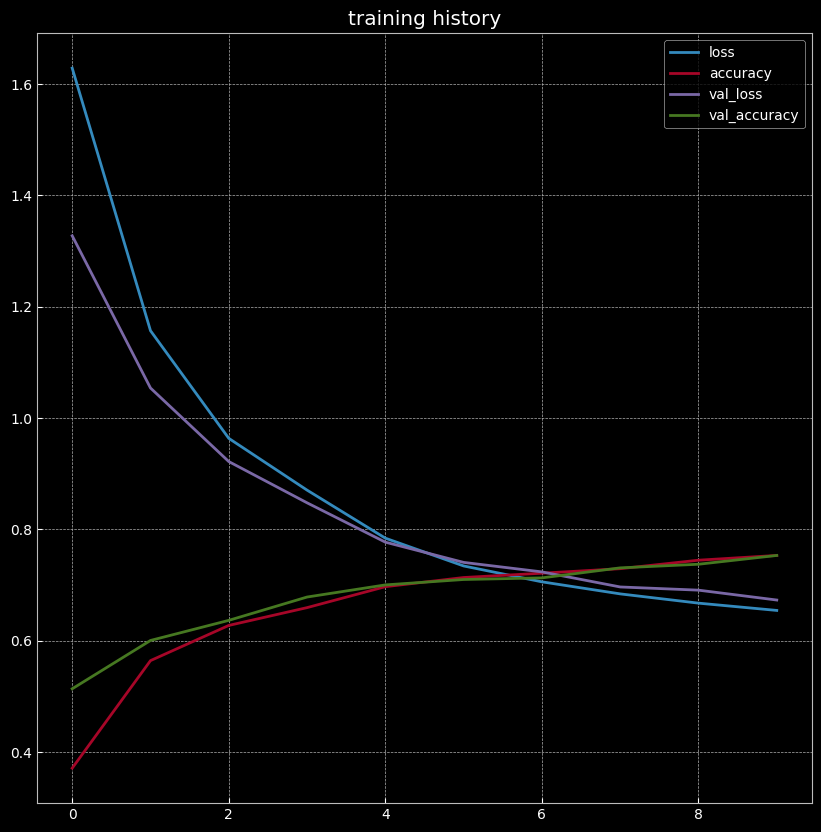

In [ ]:
pd.DataFrame(history.history).plot(title="training history")